# Data Wrangling

In [968]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import seaborn as sb
import statsmodels.api as sm
%matplotlib inline

## Gathering Data

In [24]:
# connect to Twitter API
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# set wait limit is True
api = tweepy.API(auth_handler = auth,
                wait_on_rate_limit = True,
                wait_on_rate_limit_notify = True)

In [338]:
# read tweet file
df = pd.read_csv('twitter-archive-enhanced-2.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [18]:
# check total of rows
tweet_ids = df.tweet_id.values
len(tweet_ids)

2356

In [25]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer() # set timer

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
        
end = timer() # end timer
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 488


Success
901: 758740312047005698
Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success


Success
1153: 725786712245440512
Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
11

Success
1402: 699434518667751424
Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
14

Success
1651: 683515932363329536
Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
16

Rate limit reached. Sleeping for: 546


Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
18

Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
20

Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
23

In [27]:
# check fail data
# only 25 rows, we can ignore these rows
len(fails_dict)

25

In [60]:
# read file from data gathering process
selected_attr = []

with open('tweet_json.txt','r') as file:
    for line in file:
        json_data = json.loads(line)
        # only store id, retweet count, and favorite count 
        selected_attr.append({'tweet_id': json_data['id'],
                              'retweet_count': json_data['retweet_count'],
                              'favorite_count': json_data['favorite_count']
                             })
        

In [62]:
# dump json into dataframe with columns as defined in the previous step
df_twt = pd.DataFrame(selected_attr, columns = ['tweet_id','retweet_count','favorite_count'])
df_twt.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7481,35426
1,892177421306343426,5551,30648
2,891815181378084864,3675,23057
3,891689557279858688,7648,38700
4,891327558926688256,8259,36952


In [76]:
# check total of rows
df_twt.shape

(2331, 3)

In [65]:
# merge first dataframe (initial dataframe without retweet and favorite info) 
# and second dataframe (dataframe than cointains retweet and favorite info)
# using inner join because the total of rows are the same
df_cmb = pd.merge(df, df_twt, how='inner', left_on='tweet_id', right_on='tweet_id')
df_cmb.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,7481,35426
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,5551,30648
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,3675,23057
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,7648,38700
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,8259,36952


In [74]:
# read third data, image prediction
df_img = pd.read_csv('image-predictions-3.tsv', sep="\t")
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [75]:
# check total of rows
df_img.shape

(2075, 12)

In [77]:
# merge combined dataframe 
# and third dataframe (dataframe than cointains breed prediction info from dog's image)
# using left join so we don't lose the data for now
df_cmb = pd.merge(df_cmb, df_img, how='left', left_on='tweet_id', right_on='tweet_id')
df_cmb.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [78]:
# check total of rows and columns
df_cmb.shape

(2331, 30)

## Assessing Data

In [1007]:
# copy dataframe
df_cln = df_cmb.copy()

In [1008]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2330
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2331 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2331 non-null   object 
 4   source                      2331 non-null   object 
 5   text                        2331 non-null   object 
 6   retweeted_status_id         163 non-null    float64
 7   retweeted_status_user_id    163 non-null    float64
 8   retweeted_status_timestamp  163 non-null    object 
 9   expanded_urls               2272 non-null   object 
 10  rating_numerator            2331 non-null   int64  
 11  rating_denominator          2331 non-null   int64  
 12  name                        2331 non-null   object 
 13  doggo                       2331 

In [1009]:
# check retweets
df_cln.query('retweeted_status_id == retweeted_status_id')[['tweet_id','text','retweeted_status_id']].tail(10)

,tweet_id,text,retweeted_status_id
903,754874841593970688,RT @dog_rates: This is Rubio. He has too much ...,6.791584e+17
913,753298634498793472,RT @dog_rates: This is Carly. She's actually 2...,6.815232e+17
919,752701944171524096,RT @dog_rates: HEY PUP WHAT'S THE PART OF THE ...,6.835159e+17
925,752309394570878976,RT @dog_rates: Everyone needs to watch this. 1...,6.753544e+17
988,747242308580548608,RT @dog_rates: This pupper killed this great w...,7.047611e+17
999,746521445350707200,RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17
1019,743835915802583040,RT @dog_rates: Extremely intelligent dog here....,6.671383e+17
1218,711998809858043904,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17
2234,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17
2235,667550882905632768,RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17


In [1010]:
# checking columns that can be merged into one
df_cln[['tweet_id','doggo','floofer','pupper','puppo']].head(10)

,tweet_id,doggo,floofer,pupper,puppo
0,892420643555336193,None,None,None,None
1,892177421306343426,None,None,None,None
2,891815181378084864,None,None,None,None
3,891689557279858688,None,None,None,None
4,891327558926688256,None,None,None,None
5,891087950875897856,None,None,None,None
6,890971913173991426,None,None,None,None
7,890729181411237888,None,None,None,None
8,890609185150312448,None,None,None,None
9,890240255349198849,doggo,None,None,None


In [1011]:
# checking data with non variable headers
df_cln[['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']].tail(7)

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2324,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
2325,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
2326,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2327,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2328,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2329,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2330,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [1012]:
# checking doggo columns
# this column is similar with floofer, pupper, puppo
df_cln['doggo'].value_counts()

None     2237
doggo      94
Name: doggo, dtype: int64

In [1013]:
# checking the type of dogs
df_dogs_breed1 = pd.DataFrame(df_cln['p1'].value_counts())
df_dogs_breed2 = pd.DataFrame(df_cln['p2'].value_counts())
df_dogs_breed3 = pd.DataFrame(df_cln['p3'].value_counts())

arr = []
for i in df_dogs_breed1.sort_index().index: print(i)

Afghan_hound
African_crocodile
African_grey
African_hunting_dog
Airedale
American_Staffordshire_terrier
American_black_bear
Angora
Appenzeller
Arabian_camel
Arctic_fox
Australian_terrier
Bedlington_terrier
Bernese_mountain_dog
Blenheim_spaniel
Border_collie
Border_terrier
Boston_bull
Brabancon_griffon
Brittany_spaniel
Cardigan
Chesapeake_Bay_retriever
Chihuahua
Christmas_stocking
Dandie_Dinmont
Doberman
Egyptian_cat
English_setter
English_springer
EntleBucher
Eskimo_dog
French_bulldog
German_shepherd
German_short-haired_pointer
Gordon_setter
Great_Dane
Great_Pyrenees
Greater_Swiss_Mountain_dog
Ibizan_hound
Irish_setter
Irish_terrier
Irish_water_spaniel
Italian_greyhound
Japanese_spaniel
Labrador_retriever
Lakeland_terrier
Leonberg
Lhasa
Loafer
Madagascar_cat
Maltese_dog
Mexican_hairless
Newfoundland
Norfolk_terrier
Norwegian_elkhound
Norwich_terrier
Old_English_sheepdog
Pekinese
Pembroke
Pomeranian
Rhodesian_ridgeback
Rottweiler
Saint_Bernard
Saluki
Samoyed
Scotch_terrier
Scottish_deer

In [1014]:
# checking rating_numerator and rating_denominator columns
df_cln.query('rating_denominator > 10')[['tweet_id','rating_numerator','rating_denominator']]

,tweet_id,rating_numerator,rating_denominator
328,832088576586297345,11,15
417,820690176645140481,84,70
879,758467244762497024,165,150
1044,740373189193256964,9,11
1096,731156023742988288,204,170
1141,722974582966214656,4,20
1178,716439118184652801,50,50
1204,713900603437621249,99,90
1230,710658690886586372,80,80
1250,709198395643068416,45,50


In [1015]:
# check the name of dogs
df_cln[['tweet_id','text','name']].tail(7)

,tweet_id,text,name
2324,666051853826850816,This is an odd dog. Hard on the outside but lo...,an
2325,666050758794694657,This is a truly beautiful English Wilson Staff...,a
2326,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,None
2327,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,a
2328,666033412701032449,Here is a very happy pup. Big fan of well-main...,a
2329,666029285002620928,This is a western brown Mitsubishi terrier. Up...,a
2330,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,None


In [1016]:
# check tweet with no image of prediction
df_cln[df_cln['jpg_url'].isnull() == True][['tweet_id','jpg_url','img_num']]

,tweet_id,jpg_url,img_num
29,886267009285017600,NaN,NaN
31,886054160059072513,NaN,NaN
34,885518971528720385,NaN,NaN
41,884247878851493888,NaN,NaN
54,881633300179243008,NaN,NaN
...,...,...,...
2013,671550332464455680,NaN,NaN
2124,669684865554620416,NaN,NaN
2164,668967877119254528,NaN,NaN
2187,668587383441514497,NaN,NaN


In [1017]:
df_cln.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,2.331000e+03,7.800000e+01,7.800000e+01,1.630000e+02,1.630000e+02,2331.000000,2331.000000,2331.000000,2331.000000,2059.000000,2059.000000,2.059000e+03,2.059000e+03
mean,7.419079e+17,7.455079e+17,2.014171e+16,7.690768e+17,1.378818e+16,13.134706,10.459888,2630.383526,7398.834835,1.203983,0.594176,1.347547e-01,6.043766e-02
std,6.823170e+16,7.582492e+16,1.252797e+17,6.168036e+16,1.010910e+17,46.121847,6.781159,4448.958710,11491.782872,0.563002,0.271161,1.006942e-01,5.098573e-02
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000,1.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.782670e+17,6.757419e+17,3.086374e+08,7.118465e+17,4.196984e+09,10.000000,10.000000,534.000000,1286.500000,1.000000,0.363272,5.397835e-02,1.624950e-02
50%,7.182469e+17,7.038708e+17,4.196984e+09,7.798343e+17,4.196984e+09,11.000000,10.000000,1229.000000,3209.000000,1.000000,0.587764,1.186220e-01,4.948690e-02
75%,7.986692e+17,8.257804e+17,4.196984e+09,8.190056e+17,4.196984e+09,12.000000,10.000000,3051.000000,9056.000000,1.000000,0.843855,1.957615e-01,9.233995e-02
max,8.924206e+17,8.862664e+17,8.405479e+17,8.860537e+17,7.874618e+17,1776.000000,170.000000,75585.000000,152649.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


### Issues
#### Completeness
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp have many missing values
- expanded_urls also has missing values. I think url is not relevant to be analyzed
- all columns related to dog predictions have missing values

#### Tidiness
- name, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog columns' names are not representative
- floofer, pupper, puppo, and doggo are separated into many columns

#### Quality
- <i>dog that is categorized into more than 1 dog type (example: both doggo and pupper) -> I realized this issue during the cleaning</i>
- 'None' value instead of null in floofer, pupper, puppo, and doggo 
- some tweets are retweets, we only need original tweet (example: tweet_id = 760153949710192640)
- some tweets have no image, we want to get tweets with image(s) (example: tweet_id = 886267009285017600)
- timestamp shouldn't be in string, img_num should be int, ['p1_dog','p2_dog','p3_dog'] should be not object
- inconsistency of using "-" or "_" and inconsistency of lowercase and uppercase in p1, p2, and p3 columns
- incorrect value because of hardcoded values (example: tweet_id = 832088576586297345, 740373189193256964) and some rows have denominator more than 10
- names of dog are unclear because of hardcoded values and also null values are filled as 'None'
- some columns are not relevant for analysis (expanded_urls, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, floofer, pupper, puppo, and doggo)

## Cleaning Data

### Tidiness

#### Define
> <font color="blue">name, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog columns' names are not representative </font>

#### Code

In [1018]:
# renaming some columns
df_cln.rename(columns={"name": "dog_name", "p1": "first_pred_group", "p1_conf": "first_pred_conf", "p1_dog": "is_first_pred_dog",
                        "p2": "second_pred_group", "p2_conf": "second_pred_conf", "p2_dog": "is_second_pred_dog",
                         "p3": "third_pred_group", "p3_conf": "third_pred_conf", "p3_dog": "is_third_pred_dog",
                        }, inplace=True)

#### Test

In [1019]:
# checking those renamed columns
df_cln[['dog_name','first_pred_group','first_pred_conf','is_first_pred_dog',
        'second_pred_group','second_pred_conf','is_second_pred_dog',
       'third_pred_group','third_pred_conf','is_third_pred_dog']].head()

,dog_name,first_pred_group,first_pred_conf,is_first_pred_dog,second_pred_group,second_pred_conf,is_second_pred_dog,third_pred_group,third_pred_conf,is_third_pred_dog
0,Phineas,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,Tilly,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,Archie,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,Darla,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,Franklin,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [1020]:
df_cln.shape

(2331, 30)

#### Define
> <font color="blue"> floofer, pupper, puppo, and doggo are separated into many columns</font>

#### Code

In [1021]:
# transpose separate columns into one column
# but it is still grouped by index
df_dog_cmb = pd.DataFrame(df_cln[['floofer','pupper','puppo','doggo']].stack())

In [1022]:
df_dog_cmb.head()

0
0 floofer  None
  pupper   None
  puppo    None
  doggo    None
1 floofer  None

In [1023]:
# get all rows with either floofer, pupper, puppo, or doggo value
# transfrom into a dataframe (multi index dataframe)
# drop second index
df_dog_cmb = df_dog_cmb[df_dog_cmb[0]!="None"].index.to_frame().reset_index(level=1, drop=True)

In [1024]:
# drop column 0
df_dog_cmb.drop(0, axis=1, inplace=True)

In [1025]:
# rename column 1
df_dog_cmb.rename(columns={1: "dog_stage"}, inplace=True)

In [1026]:
# join with df_cln
df_cln = pd.merge(df_cln, df_dog_cmb, how="left" ,left_index=True, right_index=True)

#### Test

In [1027]:
df_cln['dog_stage'].head(10)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9    doggo
Name: dog_stage, dtype: object

In [1028]:
df_cln.shape

(2345, 31)

### Quality 

#### Define

> - <font color ="blue">From previous issue and after did some cleaning, the result is not as we expected</font>
> - <font color ="blue">There should be 2331 rows, but the cleaning result shows there are 2345 rows</font>
> - <font color ="blue">We need to iterate the cleaning and checking tweet that is categorized into more than 1 dog type</font>

#### Code

In [1029]:
df_cln[df_cln.index.duplicated(keep=False)][['dog_stage','floofer','pupper','puppo','doggo','tweet_id','text']]

,dog_stage,floofer,pupper,puppo,doggo,tweet_id,text
183,puppo,None,None,puppo,doggo,855851453814013952,Here's a puppo participating in the #ScienceMa...
183,doggo,None,None,puppo,doggo,855851453814013952,Here's a puppo participating in the #ScienceMa...
192,floofer,floofer,None,None,doggo,854010172552949760,"At first I thought this was a shy doggo, but i..."
192,doggo,floofer,None,None,doggo,854010172552949760,"At first I thought this was a shy doggo, but i..."
444,pupper,None,pupper,None,doggo,817777686764523521,"This is Dido. She's playing the lead role in ""..."
444,doggo,None,pupper,None,doggo,817777686764523521,"This is Dido. She's playing the lead role in ""..."
514,pupper,None,pupper,None,doggo,808106460588765185,Here we have Burke (pupper) and Dexter (doggo)...
514,doggo,None,pupper,None,doggo,808106460588765185,Here we have Burke (pupper) and Dexter (doggo)...
548,pupper,None,pupper,None,doggo,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 ..."
548,doggo,None,pupper,None,doggo,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 ..."


> - <font color ="blue">after checking the tweet, it's possible to be categorized into more than 1 type because in one picture, there can be 2 dogs</font>
> - <font color ="blue">since the records is just a few (14 records), we can manually clean some of the rows</font>

In [1030]:
# manually categorize the tweets
df_cln.loc[183,'dog_stage'] = "multiple_categories"
df_cln.loc[192,'dog_stage'] = "multiple_categories"
df_cln.loc[444,'dog_stage'] = "multiple_categories"
df_cln.loc[514,'dog_stage'] = "multiple_dogs_category"
df_cln.loc[548,'dog_stage'] = "multiple_dogs_category"
df_cln.loc[557,'dog_stage'] = "multiple_categories"
df_cln.loc[687,'dog_stage'] = "multiple_categories"
df_cln.loc[715,'dog_stage'] = "multiple_dogs_category"
df_cln.loc[867,'dog_stage'] = "multiple_dogs_category"
df_cln.loc[932,'dog_stage'] = "multiple_categories"
df_cln.loc[1039,'dog_stage'] = "multiple_dogs_category"
df_cln.loc[1089,'dog_stage'] = "multiple_dogs_category"

In [1031]:
# check the changes
df_cln[df_cln.index.duplicated(keep=False)][['dog_stage','floofer','pupper','puppo','doggo','tweet_id','text']]

,dog_stage,floofer,pupper,puppo,doggo,tweet_id,text
183,multiple_categories,None,None,puppo,doggo,855851453814013952,Here's a puppo participating in the #ScienceMa...
183,multiple_categories,None,None,puppo,doggo,855851453814013952,Here's a puppo participating in the #ScienceMa...
192,multiple_categories,floofer,None,None,doggo,854010172552949760,"At first I thought this was a shy doggo, but i..."
192,multiple_categories,floofer,None,None,doggo,854010172552949760,"At first I thought this was a shy doggo, but i..."
444,multiple_categories,None,pupper,None,doggo,817777686764523521,"This is Dido. She's playing the lead role in ""..."
444,multiple_categories,None,pupper,None,doggo,817777686764523521,"This is Dido. She's playing the lead role in ""..."
514,multiple_dogs_category,None,pupper,None,doggo,808106460588765185,Here we have Burke (pupper) and Dexter (doggo)...
514,multiple_dogs_category,None,pupper,None,doggo,808106460588765185,Here we have Burke (pupper) and Dexter (doggo)...
548,multiple_dogs_category,None,pupper,None,doggo,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 ..."
548,multiple_dogs_category,None,pupper,None,doggo,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 ..."


In [1032]:
# delete duplicate rows
df_cln = df_cln[df_cln.index.duplicated(keep='first') == False]

#### Test

In [1033]:
# check one sample
df_cln[df_cln.index == 183][['dog_stage','floofer','pupper','puppo','doggo','tweet_id','text']]

,dog_stage,floofer,pupper,puppo,doggo,tweet_id,text
183,multiple_categories,None,None,puppo,doggo,855851453814013952,Here's a puppo participating in the #ScienceMa...


In [1034]:
# check total of duplicate rows
sum(df_cln.duplicated())

0

In [1035]:
# check rows and columns
df_cln.shape

(2331, 31)

#### Define

> - <font color ="blue">None value instead of null in floofer, pupper, puppo, and doggo </font>
> - <font color ="blue">But since we don't need those columns anymore, we'll check the dog_stage column instead </font>

#### Code and Test

In [1036]:
# check dog_type values
df_cln['dog_stage']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2326    NaN
2327    NaN
2328    NaN
2329    NaN
2330    NaN
Name: dog_stage, Length: 2331, dtype: object

#### Define

> <font color ="blue"> some tweets are retweets, we only need original tweet (example: tweet_id = 760153949710192640) </font>

#### Code

In [1037]:
# check rows which are retweets
df_cln[df_cln['retweeted_status_id'].isnull() == False][['tweet_id','text','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','expanded_urls']]

,tweet_id,text,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,expanded_urls
31,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,NaN,NaN,8.860537e+17,1.960740e+07,https://twitter.com/dog_rates/status/886053434...
35,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,NaN,NaN,8.305833e+17,4.196984e+09,https://twitter.com/dog_rates/status/830583320...
67,879130579576475649,RT @dog_rates: This is Emmy. She was adopted t...,NaN,NaN,8.780576e+17,4.196984e+09,https://twitter.com/dog_rates/status/878057613...
72,878404777348136964,RT @dog_rates: Meet Shadow. In an attempt to r...,NaN,NaN,8.782815e+17,4.196984e+09,"https://www.gofundme.com/3yd6y1c,https://twitt..."
73,878316110768087041,RT @dog_rates: Meet Terrance. He's being yelle...,NaN,NaN,6.690004e+17,4.196984e+09,https://twitter.com/dog_rates/status/669000397...
...,...,...,...,...,...,...,...
999,746521445350707200,RT @dog_rates: This is Shaggy. He knows exactl...,NaN,NaN,6.678667e+17,4.196984e+09,https://twitter.com/dog_rates/status/667866724...
1019,743835915802583040,RT @dog_rates: Extremely intelligent dog here....,NaN,NaN,6.671383e+17,4.196984e+09,https://twitter.com/dog_rates/status/667138269...
1218,711998809858043904,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,NaN,NaN,7.119983e+17,7.832140e+05,https://twitter.com/twitter/status/71199827977...
2234,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,NaN,NaN,6.675487e+17,4.296832e+09,https://twitter.com/dogratingrating/status/667...


In [1038]:
# exclude retweets
df_cln = df_cln[df_cln['retweeted_status_id'].isnull() == True]

#### Test

In [1039]:
# check retweets
df_cln[df_cln['retweeted_status_id'].isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,first_pred_group,first_pred_conf,is_first_pred_dog,second_pred_group,second_pred_conf,is_second_pred_dog,third_pred_group,third_pred_conf,is_third_pred_dog,dog_stage


In [1040]:
df_cln.shape

(2168, 31)

#### Define

> <font color ="blue"> some tweets have no image, we want to get tweets with image(s) (example: tweet_id = 886267009285017600) </font>

#### Code

In [1041]:
# check tweets with no image
df_cln[df_cln['jpg_url'].isnull() == True][['tweet_id','text','jpg_url']]

,tweet_id,text,jpg_url
29,886267009285017600,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN
34,885518971528720385,I have a new hero and his name is Howard. 14/1...,NaN
41,884247878851493888,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,NaN
54,881633300179243008,@roushfenway These are good dogs but 17/10 is ...,NaN
63,879674319642796034,@RealKentMurphy 14/10 confirmed,NaN
...,...,...,...
2013,671550332464455680,After 22 minutes of careful deliberation this ...,NaN
2124,669684865554620416,After countless hours of research and hundreds...,NaN
2164,668967877119254528,12/10 good shit Bubka\n@wane15,NaN
2187,668587383441514497,Never forget this vine. You will not stop watc...,NaN


In [1042]:
# exclude tweets with no image
df_cln = df_cln[df_cln['jpg_url'].isnull() == False]

#### Test

In [1043]:
# check tweets with no image
df_cln[df_cln['jpg_url'].isnull() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,first_pred_group,first_pred_conf,is_first_pred_dog,second_pred_group,second_pred_conf,is_second_pred_dog,third_pred_group,third_pred_conf,is_third_pred_dog,dog_stage


In [1044]:
df_cln.shape

(1987, 31)

#### Define

> - <font color ="blue"> timestamp shouldn't be in string </font>
> - <font color ="blue"> img_num should be int  </font>
> - <font color ="blue"> ['p1_dog','p2_dog','p3_dog'] should be not object </font>

#### Code

In [1049]:
df_cln[['tweet_id','text','timestamp','img_num','is_first_pred_dog','is_second_pred_dog','is_third_pred_dog']]

,tweet_id,text,timestamp,img_num,is_first_pred_dog,is_second_pred_dog,is_third_pred_dog
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56 +0000,1.0,False,False,False
1,892177421306343426,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27 +0000,1.0,True,True,True
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03 +0000,1.0,True,True,True
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,2017-07-30 15:58:51 +0000,1.0,False,True,False
4,891327558926688256,This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24 +0000,2.0,True,True,True
...,...,...,...,...,...,...,...
2326,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,2015-11-16 00:24:50 +0000,1.0,True,True,True
2327,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,2015-11-16 00:04:52 +0000,1.0,True,True,True
2328,666033412701032449,Here is a very happy pup. Big fan of well-main...,2015-11-15 23:21:54 +0000,1.0,True,True,True
2329,666029285002620928,This is a western brown Mitsubishi terrier. Up...,2015-11-15 23:05:30 +0000,1.0,True,True,True


In [1050]:
# convert timestamp data type to time data type
df_cln['timestamp'] = pd.to_datetime(df_cln['timestamp'])

In [1051]:
# convert img_num data type to integer
df_cln['img_num'] = df_cln['img_num'].astype('int')

In [1052]:
# convert is first/second/third pred dog data type to integer 1 or 0
df_cln['is_first_pred_dog'] = df_cln['is_first_pred_dog'].apply(lambda x: 1 if x == True else 0)
df_cln['is_second_pred_dog'] = df_cln['is_second_pred_dog'].apply(lambda x: 1 if x == True else 0)
df_cln['is_third_pred_dog'] = df_cln['is_third_pred_dog'].apply(lambda x: 1 if x == True else 0)

#### Test

In [1054]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2330
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1987 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   1987 non-null   datetime64[ns, UTC]
 4   source                      1987 non-null   object             
 5   text                        1987 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1987 non-null   object             
 10  rating_numerator            1987 non-null   int64           

#### Define

> - <font color ="blue"> inconsistency of using "-" or "_" and inconsistency of lowercase and uppercase in p1, p2, and p3 columns </font>
> - <font color ="blue"> we have renamed the columns to first_pred_group, second_pred_group, and third_pred_group </font>

#### Code

In [1055]:
df_cln[['first_pred_group', 'second_pred_group', 'third_pred_group']]

,first_pred_group,second_pred_group,third_pred_group
0,orange,bagel,banana
1,Chihuahua,Pekinese,papillon
2,Chihuahua,malamute,kelpie
3,paper_towel,Labrador_retriever,spatula
4,basset,English_springer,German_short-haired_pointer
...,...,...,...
2326,miniature_pinscher,Rottweiler,Doberman
2327,Rhodesian_ridgeback,redbone,miniature_pinscher
2328,German_shepherd,malinois,bloodhound
2329,redbone,miniature_pinscher,Rhodesian_ridgeback


In [1056]:
# lowering the text
# replace dash with underscore
df_cln['first_pred_group'] = df_cln.first_pred_group.str.lower().replace('-','_', regex=True)
df_cln['second_pred_group'] = df_cln.second_pred_group.str.lower().replace('-','_', regex=True)
df_cln['third_pred_group'] = df_cln.third_pred_group.str.lower().replace('-','_', regex=True)

#### Test

In [1057]:
# check one sample
print("contains dash: " , len(df_cln[df_cln['first_pred_group'] == "black-footed_ferret"]))
print("does not contain dash:" , len(df_cln[df_cln['first_pred_group'] == "black_footed_ferret"]))

contains dash:  0
does not contain dash: 1


#### Define

> <font color ="blue"> incorrect value because of harcoded values (example: tweet_id = 832088576586297345, 740373189193256964) and some rows have denominator more than 10 </font>

#### Code

In [1058]:
# checking rating_numerator and rating_denominator columns
df_cln.query('rating_denominator > 10')[['tweet_id','rating_numerator','rating_denominator']]

,tweet_id,rating_numerator,rating_denominator
417,820690176645140481,84,70
879,758467244762497024,165,150
1044,740373189193256964,9,11
1096,731156023742988288,204,170
1141,722974582966214656,4,20
1178,716439118184652801,50,50
1204,713900603437621249,99,90
1230,710658690886586372,80,80
1250,709198395643068416,45,50
1327,704054845121142784,60,50


In [1059]:
# there are 16 records that have denominator more than 10
# we can check them manually by sampling 
# so some of them have more than 1 dog in the picture, that's why the denominator is more than 10
# but some of them have the wrong value due to harcode 
# manually change the value
df_cln.loc[1044,['rating_numerator','rating_denominator']] = [14,10]
df_cln.loc[1141,['rating_numerator','rating_denominator']] = [13,10]
df_cln.loc[1178,['rating_numerator','rating_denominator']] = [11,10]
df_cln.loc[1638,['rating_numerator','rating_denominator']] = [10,10]
df_cln.loc[1638,['rating_numerator','rating_denominator']] = [10,10]

In [1060]:
# create a column to get rating in decimal
df_cln['final_rating'] = df_cln['rating_numerator'] / df_cln['rating_denominator']

In [1061]:
# final rating distribution
df_cln['final_rating'].describe()

count    1987.000000
mean        1.170120
std         4.074147
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: final_rating, dtype: float64

In [1062]:
# quickly check non-outliers data
df_cln[df_cln.final_rating.between(df_cln.final_rating.quantile(.15), df_cln.final_rating.quantile(.85))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,first_pred_conf,is_first_pred_dog,second_pred_group,second_pred_conf,is_second_pred_dog,third_pred_group,third_pred_conf,is_third_pred_dog,dog_stage,final_rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,0,bagel,0.085851,0,banana,0.076110,0,NaN,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,1,pekinese,0.090647,1,papillon,0.068957,1,NaN,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,1,malamute,0.078253,1,kelpie,0.031379,1,NaN,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,0,labrador_retriever,0.168086,1,spatula,0.040836,0,NaN,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,1,english_springer,0.225770,1,german_short_haired_pointer,0.175219,1,NaN,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,666063827256086533,NaN,NaN,2015-11-16 01:22:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,...,0.775930,1,tibetan_mastiff,0.093718,1,labrador_retriever,0.072427,1,NaN,1.0
2322,666057090499244032,NaN,NaN,2015-11-16 00:55:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,...,0.962465,0,shopping_basket,0.014594,0,golden_retriever,0.007959,1,NaN,0.9
2323,666055525042405380,NaN,NaN,2015-11-16 00:49:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,...,0.692517,1,tibetan_mastiff,0.058279,1,fur_coat,0.054449,0,NaN,1.0
2325,666050758794694657,NaN,NaN,2015-11-16 00:30:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,...,0.651137,1,english_springer,0.263788,1,greater_swiss_mountain_dog,0.016199,1,NaN,1.0


In [1063]:
# business wise, it's okay to have very low rating, meanwhile it's not really good to have bery high rating
# especially if it's more than 1
# so we can remove all rows that have final_rating in more than or equal to 85% area
# check example
df_cln[df_cln['final_rating'] > df_cln.final_rating.quantile(.85)][['text','tweet_id','final_rating']].describe()

,tweet_id,final_rating
count,4.200000e+01,42.000000
mean,8.152598e+17,6.814966
std,5.614544e+16,27.721497
min,6.708428e+17,1.400000
25%,7.804834e+17,1.400000
50%,8.239990e+17,1.400000
75%,8.564655e+17,1.400000
max,8.902403e+17,177.600000


In [1064]:
# if we see from data above, amongst outliers 1.4 is still in average and median of final_rating
# in the end maybe it's better to use 1.4 as the benchmark and remove other values that are greater than that
df_cln = df_cln[df_cln['final_rating'] <= 1.4]

#### Test

In [1065]:
df_cln['final_rating'].describe()

count    1981.000000
mean        1.054619
std         0.218362
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max         1.400000
Name: final_rating, dtype: float64

In [1066]:
df_cln.shape

(1981, 32)

#### Define

> <font color ="blue"> names of dog are unclear because of hardcoded values and also null values are filled as 'None' </font>

#### Code

In [1067]:
# since non dog's names start with lowercase, we can use mask method to make them null
mask = df_cln.dog_name.str.islower()

In [1068]:
# set to null
df_cln.loc[mask, 'dog_name'] = np.nan

/Users/primapermatalusiana/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [1069]:
# check the other 'None' values
df_cln[df_cln['dog_name'] == 'None']['dog_name']

5       None
7       None
12      None
23      None
24      None
        ... 
2317    None
2318    None
2319    None
2326    None
2330    None
Name: dog_name, Length: 544, dtype: object

In [1070]:
# convert None into null
df_cln['dog_name'].replace('None',np.nan, regex=False, inplace=True)

/Users/primapermatalusiana/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


#### Test

In [1071]:
# check the other 'None' values
df_cln[df_cln['dog_name'] == 'None']['dog_name']

Series([], Name: dog_name, dtype: object)

In [1072]:
df_cln['dog_name'].value_counts()

Oliver     10
Charlie    10
Cooper     10
Lucy        9
Penny       9
           ..
Alf         1
Tilly       1
Gromit      1
Jeffrie     1
Link        1
Name: dog_name, Length: 910, dtype: int64

In [1073]:
df_cln.shape

(1981, 32)

#### Define

> <font color ="blue"> some columns are not relevant for analysis (expanded_urls, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, floofer, pupper, puppo, and doggo) </font>

#### Code

In [1074]:
# drop some not relevant columns
df_cln = df_cln.drop(['expanded_urls', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'floofer', 'pupper', 'puppo', 'doggo','rating_numerator','rating_denominator','source'], axis=1)

#### Test

In [1075]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 2330
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1981 non-null   int64              
 1   timestamp           1981 non-null   datetime64[ns, UTC]
 2   text                1981 non-null   object             
 3   dog_name            1339 non-null   object             
 4   retweet_count       1981 non-null   int64              
 5   favorite_count      1981 non-null   int64              
 6   jpg_url             1981 non-null   object             
 7   img_num             1981 non-null   int64              
 8   first_pred_group    1981 non-null   object             
 9   first_pred_conf     1981 non-null   float64            
 10  is_first_pred_dog   1981 non-null   int64              
 11  second_pred_group   1981 non-null   object             
 12  second_pred_conf    1981 non-null 

In [1076]:
# dump into csv file
df_cln.to_csv('twitter_archive_master.csv')

# Analyzing Data

### Questions

> - How is the proportion of dog's breed?
> - What is the breed of dogs that have higher ratings and low ratings?
> - Do retweet and favorite count impact the final rating?
> - Do retweet count, favorite count, and final rating impact to whether it's dog or not?

## How is the proportion of dog's breed?

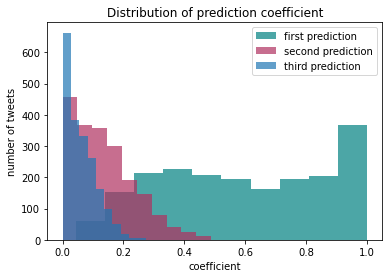

In [1077]:
# create histogram to see the distribution of each prediction coefficient column
plt.hist(df_cln['first_pred_conf'], label='first prediction', alpha=0.7, color='#008080')
plt.hist(df_cln['second_pred_conf'], label = 'second prediction', alpha=0.7, color='#B03060')
plt.hist(df_cln['third_pred_conf'], label = 'third prediction', alpha=0.7)

plt.title('Distribution of prediction coefficient')
plt.ylabel('number of tweets')
plt.xlabel('coefficient')
plt.legend()

In [1078]:
# store the highest prediction coefficient score of each tweet
final_pred = []
for i, row in df_cln.iterrows():
    max_num = row[['first_pred_conf', 'second_pred_conf','third_pred_conf']].max()
    if max_num == row['first_pred_conf']:
        final_pred.append({
            'final_pred_group': row['first_pred_group'],
            'final_pred_conf': row['first_pred_conf'],
            'is_final_pred_dog': row['is_first_pred_dog']
        })
    elif max_num == row['second_pred_conf']:
        final_pred.append({
            'final_pred_group': row['second_pred_group'],
            'final_pred_conf': row['second_pred_conf'],
            'is_final_pred_dog': row['is_second_pred_dog']
        })
    elif max_num == row['third_pred_conf']:
        final_pred.append({
            'final_pred_group': row['third_pred_group'],
            'final_pred_conf': row['third_pred_conf'],
            'is_final_pred_dog': row['is_third_pred_dog']
        })

In [1109]:
final_pred = pd.DataFrame(final_pred)
final_pred

,final_pred_group,final_pred_conf,is_final_pred_dog
0,orange,0.097049,0
1,chihuahua,0.323581,1
2,chihuahua,0.716012,1
3,paper_towel,0.170278,0
4,basset,0.555712,1
...,...,...,...
1976,miniature_pinscher,0.560311,1
1977,rhodesian_ridgeback,0.408143,1
1978,german_shepherd,0.596461,1
1979,redbone,0.506826,1


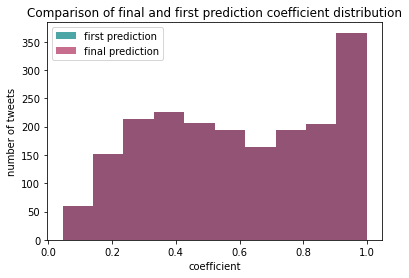

In [1081]:
# check whether first prediaction coefficient and new highest coefficient is overlap 
# (because first predictions seems to have the most convenient algorithm)

plt.hist(df_cln['first_pred_conf'], label='first prediction', alpha=0.7, color='#008080')
plt.hist(final_pred['final_pred_conf'], label='final prediction', alpha=0.7, color='#B03060')

plt.title('Comparison of final and first prediction coefficient distribution')
plt.ylabel('number of tweets')
plt.xlabel('coefficient')
plt.legend()

In [1082]:
# after seeing that first prediction also covers as the highest coef, we can user first prediction instead
temp_pred = df_cln['first_pred_group'].value_counts()
temp_pred = pd.DataFrame(temp_pred)
temp_pred.reset_index(inplace=True)

In [1083]:
# set the proportion of each breed
temp_per = temp_pred.groupby('index').agg(percentage =('first_pred_group', lambda p: p.sum() / temp_pred.first_pred_group.sum() * 100)).round(2)

In [1084]:
# get top 10 data because there are so many of breeds
temp_per = temp_per.nlargest(10,'percentage', keep='all')

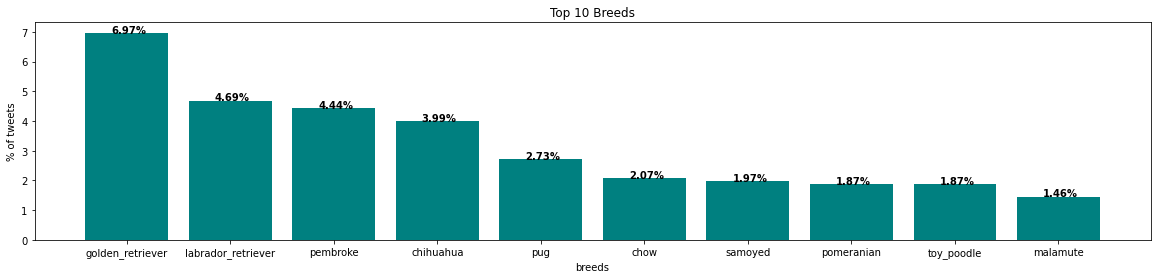

In [1085]:
# create a chart to see top 10 breeds
fig,ax = plt.subplots(figsize=(20,4))
plt.bar(temp_per.index, temp_per.percentage.values, color='#008080')
plt.title('Top 10 Breeds')
plt.ylabel('% of tweets')
plt.xlabel('breeds')

for rect in ax.patches:
    ax.text ((rect.get_x() + rect.get_width() / 2)-0.15,rect.get_height(),"%.2f%%"% rect.get_height(), weight='bold' )

## What is the breed of dogs that have higher ratings and low ratings?

In [1086]:
# check the descriptive values of final rating data
df_cln['final_rating'].describe()

count    1981.000000
mean        1.054619
std         0.218362
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max         1.400000
Name: final_rating, dtype: float64

In [1087]:
# set bin edges and names based on 5 number summary
bin_edges = [0, 1, 1.1, 1.2, 1.4]
bin_names = ['low', 'medium', 'moderately_high', 'high']

In [1088]:
# creates rating_levels column
df_cln['rating_levels'] = pd.cut(df_cln['final_rating'], bin_edges, labels=bin_names)

# checks for successful creation of this column
df_cln.head()

,tweet_id,timestamp,text,dog_name,retweet_count,favorite_count,jpg_url,img_num,first_pred_group,first_pred_conf,is_first_pred_dog,second_pred_group,second_pred_conf,is_second_pred_dog,third_pred_group,third_pred_conf,is_third_pred_dog,dog_stage,final_rating,rating_levels
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,7481,35426,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,0,bagel,0.085851,0,banana,0.076110,0,NaN,1.3,high
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,5551,30648,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,1,pekinese,0.090647,1,papillon,0.068957,1,NaN,1.3,high
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,3675,23057,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,1,malamute,0.078253,1,kelpie,0.031379,1,NaN,1.2,moderately_high
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,Darla,7648,38700,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,0,labrador_retriever,0.168086,1,spatula,0.040836,0,NaN,1.3,high
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,Franklin,8259,36952,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,1,english_springer,0.225770,1,german_short_haired_pointer,0.175219,1,NaN,1.2,moderately_high


([<matplotlib.patches.Wedge at 0x7f99cc03aa30>,
 [Text(-1.0649271690613797, 0.27555421353141385, 'low'),
  Text(0.23052438015149654, -1.0755735726373015, 'moderately_high'),
  Text(1.0999968811694447, -0.002619430757709567, 'medium'),
  Text(0.49495028590611795, 0.9823564599886604, 'high')],
 [Text(-0.5808693649425707, 0.15030229828986208, '41.9%'),
  Text(0.12574057099172536, -0.5866764941658008, '22.8%'),
  Text(0.5999982988196971, -0.001428780413296127, '20.4%'),
  Text(0.26997288322151886, 0.535830796357451, '14.9%')])

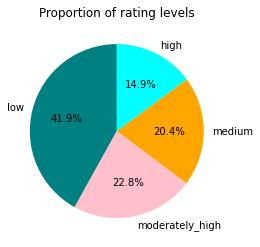

In [1133]:
fig1, ax1 = plt.subplots()
plt.title('Proportion of rating levels')
ax1.pie(df_cln['rating_levels'].value_counts().values, labels=df_cln['rating_levels'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['teal', 'pink', 'orange', 'aqua'])

In [1138]:
df_cln[df_cln['first_pred_group'] == 'web_site'][['text','tweet_id','first_pred_group','is_first_pred_dog']]

,text,tweet_id,first_pred_group,is_first_pred_dog
51,"This is Koko. Her owner, inspired by Barney, r...",882045870035918850,web_site,0
205,This is Iggy. He was a rescue dog killed in th...,851464819735769094,web_site,0
263,I didn't even have to intervene. Took him 4 mi...,840696689258311684,web_site,0
456,Meet Moose. He doesn't want his friend to go b...,816450570814898180,web_site,0
536,This is Bo. He's going to make me cry. 13/10 p...,804026241225523202,web_site,0
631,Here is a perfect example of someone who has t...,792913359805018113,web_site,0
758,I can't tap the screen to make the hearts appe...,776088319444877312,web_site,0
762,This girl straight up rejected a guy because h...,775729183532220416,web_site,0
901,This is one of the most inspirational stories ...,755206590534418437,web_site,0
1029,Was just informed about this hero pupper and o...,742465774154047488,web_site,0


In [1089]:
# see the proportion of each breed in low rating
low_pred = df_cln.query('rating_levels == "low"')['first_pred_group'].value_counts()
low_pred = pd.DataFrame(low_pred)
low_pred.reset_index(inplace=True)

temp_low = low_pred.groupby('index').agg(percentage =('first_pred_group', lambda p: p.sum() / low_pred.first_pred_group.sum() * 100)).round(2)
temp_low = temp_low.nlargest(10,'percentage', keep='all')


In [1090]:
# see the proportion of each breed in medium rating
med_pred = df_cln.query('rating_levels == "medium"')['first_pred_group'].value_counts()
med_pred = pd.DataFrame(med_pred)
med_pred.reset_index(inplace=True)

temp_med = med_pred.groupby('index').agg(percentage =('first_pred_group', lambda p: p.sum() / med_pred.first_pred_group.sum() * 100)).round(2)
temp_med = temp_med.nlargest(10,'percentage', keep='all')

In [1091]:
# see the proportion of each breed in moderately high rating
mod_pred = df_cln.query('rating_levels == "moderately_high"')['first_pred_group'].value_counts()
mod_pred = pd.DataFrame(mod_pred)
mod_pred.reset_index(inplace=True)

temp_mod = mod_pred.groupby('index').agg(percentage =('first_pred_group', lambda p: p.sum() / mod_pred.first_pred_group.sum() * 100)).round(2)
temp_mod = temp_mod.nlargest(10,'percentage', keep='all')

In [1092]:
# see the proportion of each breed in high rating
hig_pred = df_cln.query('rating_levels == "high"')['first_pred_group'].value_counts()
hig_pred = pd.DataFrame(hig_pred)
hig_pred.reset_index(inplace=True)

temp_hig = hig_pred.groupby('index').agg(percentage =('first_pred_group', lambda p: p.sum() / hig_pred.first_pred_group.sum() * 100)).round(2)
temp_hig = temp_hig.nlargest(10,'percentage', keep='all')

In [1093]:
# join all those four dataframe (that represent low, medium, moderately high, and high rating)
step_one = pd.merge(temp_low, temp_med, how='outer', left_on=temp_low.index, right_on=temp_med.index)
step_one.rename(columns={'key_0':'breed_pred','percentage_x':'perc_low','percentage_y':'perc_med'}, inplace=True)
step_two = pd.merge(step_one, temp_mod, how='outer', left_on='breed_pred', right_on=temp_mod.index)
step_three = pd.merge(step_two, temp_hig, how='outer', left_on='breed_pred', right_on=temp_hig.index)
step_three.rename(columns={'percentage_x':'perc_mod','percentage_y':'perc_hig'}, inplace=True)
step_three.head()

,breed_pred,perc_low,perc_med,perc_mod,perc_hig
0,chihuahua,3.98,2.98,4.87,4.08
1,pug,3.86,2.48,NaN,2.72
2,labrador_retriever,3.61,6.20,5.53,4.42
3,golden_retriever,3.25,6.45,11.95,10.54
4,pembroke,1.69,6.45,5.97,7.14


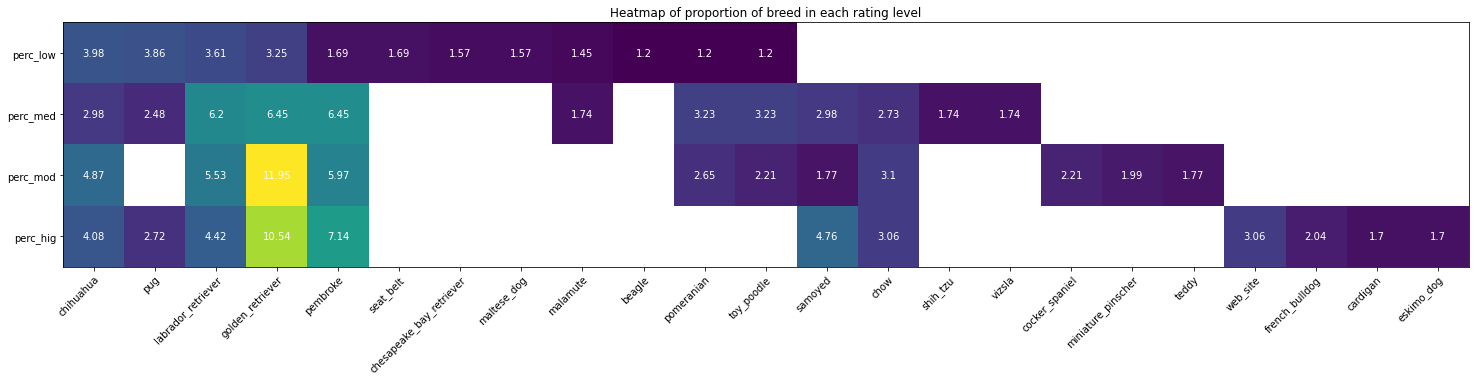

In [1108]:
# define x, y, and values
y = ['perc_low','perc_med','perc_mod','perc_hig']
x = step_three['breed_pred'].values
arr_fill = step_three[['perc_low','perc_med','perc_mod','perc_hig']].T.values

fig, ax = plt.subplots(figsize=(25,5))
im = ax.imshow(arr_fill)

# we want to show all ticks
ax.set_xticks(np.arange(len(x)))
ax.set_yticks(np.arange(len(y)))

# and label them with the respective list entries
ax.set_xticklabels(x)
ax.set_yticklabels(y)

# rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(y)):
    for j in range(len(x)):
        text = ax.text(j, i, arr_fill[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Heatmap of proportion of breed in each rating level")
fig.tight_layout()
plt.show()

## Do retweet and favorite count impact the final rating?

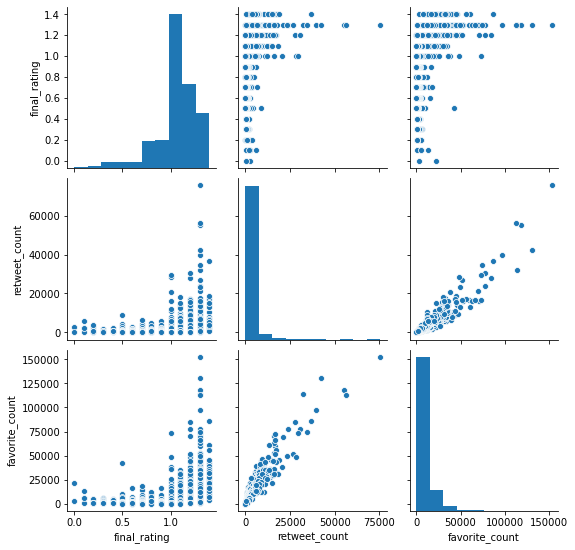

In [1095]:
# quickly create the pairplot to see the scatterplot of two columns
sb.pairplot(df_cln[['final_rating','retweet_count','favorite_count']])

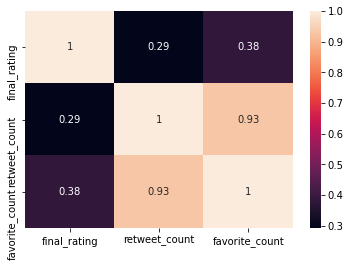

In [1141]:
sb.heatmap(df_cln[['final_rating','retweet_count','favorite_count']].corr(), annot=True)
plt.show()

In [1096]:
# set interceipt
df_cln['interceipt'] = 1

In [1097]:
# build linear regression model
lm = sm.OLS(df_cln['final_rating'], df_cln[ ['interceipt','retweet_count','favorite_count'] ] )
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           final_rating   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     215.1
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           3.03e-85
Time:                        22:34:26   Log-Likelihood:                 398.78
No. Observations:                1981   AIC:                            -791.6
Df Residuals:                    1978   BIC:                            -774.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
interceipt         0.9903      0.005    181.943      0.000       0.980       1.001
retweet_count  -2.419e-05    2.8e-06     -8.631      0.000   -2.97e-05   -1.87e-05
favorite_count  1.508e-05      1e-06     15.013      0.000    1.31e-05    1.71e-05
==============================================================================
Omnibus:                      704.477   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2625.863
Skew:                          -1.734   Prob(JB):                         0.00
Kurtosis:                       7.448   Cond. No.                     1.85e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1098]:
# add new variable
df_cln['retweet_fav'] = df_cln['retweet_count'] * df_cln['favorite_count']

In [1099]:
# combine new variables 
lm_two = sm.OLS(df_cln['final_rating'], df_cln[ ['interceipt','retweet_count','favorite_count','first_pred_conf','retweet_fav'] ] )
result_two = lm_two.fit()
result_two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           final_rating   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     125.3
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           2.05e-95
Time:                        22:34:26   Log-Likelihood:                 427.77
No. Observations:                1981   AIC:                            -845.5
Df Residuals:                    1976   BIC:                            -817.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
interceipt          0.9480      0.011     86.467      0.000       0.926       0.969
retweet_count   -5.171e-06   3.83e-06     -1.350      0.177   -1.27e-05    2.34e-06
favorite_count   1.282e-05   1.03e-06     12.387      0.000    1.08e-05    1.48e-05
first_pred_conf     0.0436      0.016      2.689      0.007       0.012       0.075
retweet_fav     -1.592e-10   2.27e-11     -7.029      0.000   -2.04e-10   -1.15e-10
==============================================================================
Omnibus:                      714.809   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2812.719
Skew:                          -1.738   Prob(JB):                         0.00
Kurtosis:                       7.690   Cond. No.                     1.79e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Do retweet count, favorite count, and final rating impact to whether it's dog or not?

In [1102]:
# build logistic regression model 
lr = sm.Logit(df_cln['is_first_pred_dog'], df_cln[['interceipt','retweet_count','favorite_count','retweet_fav','final_rating']])

# fitting the model and see the summary result
result_lr = lr.fit()
result_lr.summary()

Optimization terminated successfully.
         Current function value: 0.526559
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      is_first_pred_dog   No. Observations:                 1981
Model:                          Logit   Df Residuals:                     1976
Method:                           MLE   Df Model:                            4
Date:                Thu, 19 Nov 2020   Pseudo R-squ.:                 0.08109
Time:                        22:34:47   Log-Likelihood:                -1043.1
converged:                       True   LL-Null:                       -1135.2
Covariance Type:            nonrobust   LLR p-value:                 9.810e-39
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
interceipt        -2.0417      0.270     -7.552      0.000      -2.572      -1.512
retweet_count     -0.0002   4.99e-05     -4.440      0.000      -0.000      -0.000
favorite_count  2.683e-05   1.47e-05      1.827      0.068   -1.96e-06    5.56e-05
retweet_fav       1.4e-09   4.15e-10      3.369      0.001    5.85e-10    2.21e-09
final_rating       3.2134      0.280     11.488      0.000       2.665       3.762
==================================================================================
"""

# Resources

- https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html
- https://www.dataforeverybody.com/matplotlib-seaborn-pie-charts/
- https://datatofish.com/if-condition-in-pandas-dataframe/